## Topic : Simpson's Paradox
### Peer Evaluation Exercise 

Prerequisites : Averaging and ratio calculation, simple graphical presentation techniques, possibly logistic regression 
In 1972-1974, in Whickham, a town in the north-east of England, located approximately 6.5 kilometres south-west of Newcastle upon Tyne, a survey of one-sixth of the electorate was conducted in order to inform work on thyroid and heart disease (Tunbridge and al. 1977). A continuation of this study was carried out twenty years later. (Vanderpump et al. 1995). Some of the results were related to smoking and whether individuals were still alive at the time of the second study. For the purpose of simplicity, we will restrict the data to women and among these to the 1314 that were categorized as "smoking currently" or "never smoked". There were relatively few women in the initial survey who smoked but have since quit (162) and very few for which information was not available (18). Survival at 20 years was determined for all women of the first survey.

All these data are available in this file [CSV](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv). On each line its given if the person smokes or not, whether alive or dead at the time of the second study, and his age at the time of the first survey.

This exercise is done using Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm
import seaborn as sns
# Data URL for Simpson's Paradox to import data
data_url = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv'
data = pd.read_csv(data_url)

#### Analysing the dataset by exploring the values present, basic information on type and count and checking for any outliers.

In [2]:
#Checking Data
print(data.head())
print(data.tail())

  Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4
     Smoker Status   Age
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1


In [3]:
#Basic information on data (count, columns, datatypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Smoker  1314 non-null   object 
 1   Status  1314 non-null   object 
 2   Age     1314 non-null   float64
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [4]:
#Data cleaning if Nan present - Outlier check
print("Null Values present:")
print(data.isnull().sum())
if (data.isnull().sum().sum() != 0):
    data.dropna()

Null Values present:
Smoker    0
Status    0
Age       0
dtype: int64


#### Distinguishing smoker and non smoker data

In [5]:
# Filtering smoker and non smoker data
smoker_data = data[data.Smoker == "Yes"]
non_smoker_data = data[data.Smoker == "No"]
print("Number of smokers     :", len(smoker_data))
print("Number of non-smokers :", len(non_smoker_data))

Number of smokers     : 582
Number of non-smokers : 732


### Q 1) Tabulate the total number of women alive and dead over the period according to their smoking habits. Calculate in each group (smoking/non-smoking) the mortality rate (the ratio of the number of women who died in a group to the total number of women in that group). You can graph these data and calculate confidence intervals if you wish. Why is this result surprising?

Smoker: 
 Status
Alive    443
Dead     139
Name: Smoker, dtype: int64 

Non-Smoker: 
 Status
Alive    502
Dead     230
Name: Smoker, dtype: int64


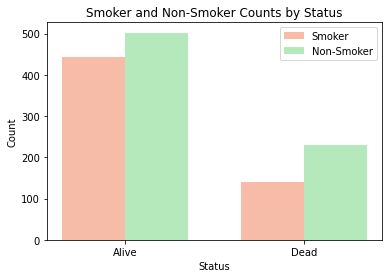

In [6]:
#1) a. Tabulate the total number of women alive and dead over the period according to their smoking habits.


# Extracting statuses from the data
statuses = smoker_data['Status'].unique()

# Get smoker and non-smoker counts for each status
smoker_counts = smoker_data.groupby('Status')['Smoker'].count()
non_smoker_counts = non_smoker_data.groupby('Status')['Smoker'].count()

print("Smoker: \n", smoker_counts,'\n')
print("Non-Smoker: \n",non_smoker_counts)

# Plotting the data analysed
bar_width = 0.35
r = np.arange(len(statuses))
plt.bar(r, smoker_counts, color='#f7bca8', width=bar_width, label='Smoker')
plt.bar(r + bar_width, non_smoker_counts, color='#b5e8bb', width=bar_width, label='Non-Smoker')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Smoker and Non-Smoker Counts by Status')
plt.xticks(r + bar_width / 2, statuses)
plt.legend()
plt.show()

### Observation
There are a total of 582 individuals categorized as "Smoker", out of which 443 are currently alive and 139 are dead.
There are total of 732 individuals categorized as "Non - Smoker", out of which 502 are currently alive and 230 are dead.

In [7]:
# Calculating mortality rate for smokers
smokers_mortality_rate = (smoker_data.groupby('Status')['Smoker'].count()['Dead'] / len(smoker_data))* 100
print("Mortality Rate for Smokers: {:.2f}%".format(smokers_mortality_rate))

# Calculating mortality rate for non-smokers
non_smokers_mortality_rate = (non_smoker_data.groupby('Status')['Smoker'].count()['Dead'] / len(non_smoker_data))* 100
print("Mortality Rate for Non-Smokers: {:.2f}%".format(non_smokers_mortality_rate))


Mortality Rate for Smokers: 23.88%
Mortality Rate for Non-Smokers: 31.42%


### Observation
#### For smokers, the mortality rate is 23.88%, indicating that approximately 23.88% of individuals classified as smokers have passed away.
#### For non-smokers, the mortality rate is 31.42%, signifying that around 31.42% of individuals classified as non-smokers have experienced mortality.
#### It is very suprising to notice that the non-smokers experience higher mortality compared to that of the smokers

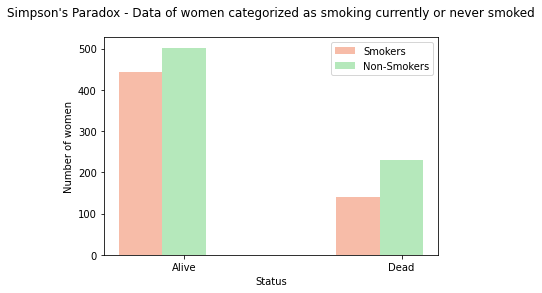

In [8]:
# Plotting the data (alive, dead )
x = np.arange(2) 
y1 = [smoker_data.groupby('Status')['Smoker'].count()['Alive'],smoker_data.groupby('Status')['Smoker'].count()['Dead']] 
y2 = [non_smoker_data.groupby('Status')['Smoker'].count()['Alive'],non_smoker_data.groupby('Status')['Smoker'].count()['Dead']] 
width = 0.20
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width,  color='#f7bca8') 
plt.bar(x, y2, width,  color='#b5e8bb') 

plt.xticks(x, ['Alive', 'Dead']) 
plt.xlabel("Status") 
plt.ylabel("Number of women") 
plt.title("Simpson's Paradox - Data of women categorized as smoking currently or never smoked\n") 
plt.legend(['Smokers', 'Non-Smokers'], loc='upper right') 
  
plt.show()

### Observation
It is obvious that the number of persons who are alive is higher among nonsmokers, but the number of smokers who are alive is equally comparable. 
Similarly, the number of people who have died is higher in the nonsmoking group than in the smokers group.

### Q 2) Go back to question 1 (numbers and mortality rates) and add a new category related to the age group. For example, the following classes will be considered: 18-34 years, 34-54 years, 55-64 years, over 65 years. Why is this result surprising? Can you explain this paradox? Similarly, you may wish to provide a graphical representation of the data to support your explanations.

In [9]:
#Added a new category related to the age group. For example, the following classes will be considered: 18-34 years, 34-54 years, 55-64 years, over 65 years.
data_age_grouped = data.copy()
data_age_grouped['Age_Group'] = pd.cut(data_age_grouped['Age'], bins=[18,34,54,64,999],  labels=['18-34', '34-54', '54-64','65+'],include_lowest=True)
data_age_grouped.drop(['Age'],axis=1, inplace=True)
print(data_age_grouped.head())

  Smoker Status Age_Group
0    Yes  Alive     18-34
1    Yes  Alive     18-34
2     No   Dead     54-64
3     No  Alive     34-54
4    Yes  Alive       65+


In [10]:
# Distinguishing smoker and non smoker data with respect to age category
print("--------------------------------------------------------------------------------- \n")
smoker_data_age_grouped = data_age_grouped[data_age_grouped.Smoker == "Yes"]
non_smoker_data_age_grouped = data_age_grouped[data_age_grouped.Smoker == "No"]
print("Smoker:\n", smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count(),'\n')
print("Non-Smoker:\n",non_smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count(),'\n')
print("--------------------------------------------------------------------------------- \n")

# Calculating mortality rate for each age group for smoker and non smokers
smokers_mortality_rate_18_34 = smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "18-34"].groupby('Status')['Smoker'].count()['Dead'] / len(smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "18-34"])
    
smokers_mortality_rate_34_54 = smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "34-54"].groupby('Status')['Smoker'].count()['Dead'] / len(smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "34-54"])

smokers_mortality_rate_54_64 = smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "54-64"].groupby('Status')['Smoker'].count()['Dead'] / len(smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "54-64"])
    
smokers_mortality_rate_65_above = smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "65+"].groupby('Status')['Smoker'].count()['Dead'] / len(smoker_data_age_grouped[smoker_data_age_grouped.Age_Group == "65+"])
        
print("Smokers Mortality rate per age category:\n")
print("18-34 : {:.2%}".format(smokers_mortality_rate_18_34))
print("34-54 : {:.2%}".format(smokers_mortality_rate_34_54))
print("54-64 : {:.2%}".format(smokers_mortality_rate_54_64))
print("65+   : {:.2%}".format(smokers_mortality_rate_65_above))


non_smokers_mortality_rate_18_34 = non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "18-34"].groupby('Status')['Smoker'].count()['Dead'] / len(non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "18-34"])
    
non_smokers_mortality_rate_34_54 = non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "34-54"].groupby('Status')['Smoker'].count()['Dead'] / len(non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "34-54"])

non_smokers_mortality_rate_54_64 = non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "54-64"].groupby('Status')['Smoker'].count()['Dead'] / len(non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "54-64"])
    
non_smokers_mortality_rate_65_above = non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "65+"].groupby('Status')['Smoker'].count()['Dead'] / len(non_smoker_data_age_grouped[non_smoker_data_age_grouped.Age_Group == "65+"])
        
print("\nNon-Smokers Mortality rate per age category:\n")
print("18-34 : {:.2%}".format(non_smokers_mortality_rate_18_34))
print("34-54 : {:.2%}".format(non_smokers_mortality_rate_34_54))
print("54-64 : {:.2%}".format(non_smokers_mortality_rate_54_64))
print("65+   : {:.2%}".format(non_smokers_mortality_rate_65_above), '\n')

print("--------------------------------------------------------------------------------- \n")

--------------------------------------------------------------------------------- 

Smoker:
 Age_Group
18-34    181
34-54    237
54-64    115
65+       49
Name: Smoker, dtype: int64 

Non-Smoker:
 Age_Group
18-34    219
34-54    199
54-64    121
65+      193
Name: Smoker, dtype: int64 

--------------------------------------------------------------------------------- 

Smokers Mortality rate per age category:

18-34 : 2.76%
34-54 : 17.30%
54-64 : 44.35%
65+   : 85.71%

Non-Smokers Mortality rate per age category:

18-34 : 2.74%
34-54 : 9.55%
54-64 : 33.06%
65+   : 85.49% 

--------------------------------------------------------------------------------- 



### Observation
 The 34-54 age group has the highest number of smokers (237). The 18-34 and 54-64 age categories also have a substantial count. The 65+ age group has the lowest number of smokers. Non-smokers had the highest count in the 18-34 age group (219 persons). Counts are similar in the 34-54 and 54-64 age groups. The 65+ age group has the highest number of nonsmokers.

Mortality rates by age category: Smoking is associated with higher mortality rates as people age. Age groups,18-34: 3%; 34-54: 17%; 54-64: 44%; and 65+: 86%,  Evident that Mortality rates increase with age. Similarly Non-smokers experience higher mortality rates as they age too. Age groups, 18-34 (3%), 34-54 (10%), 54-64 (33%), and 65+ (85%).

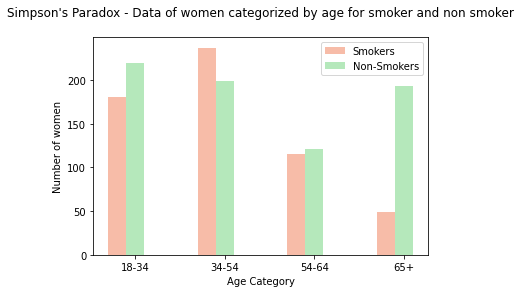

In [11]:
#Plotting Data (age categorized 18-34, 34-54, 54-64, 65+ for smoker and non smoker data )
x = np.arange(4) 

y1 = [smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['18-34'],
      smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['34-54'],
      smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['54-64'],
      smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['65+']] 

y2 = [non_smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['18-34'],
      non_smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['34-54'],
      non_smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['54-64'],
      non_smoker_data_age_grouped.groupby('Age_Group')['Smoker'].count()['65+']] 

# plot data in grouped manner of bar type 
width = 0.20
plt.bar(x-0.2, y1, width,  color='#f7bca8') 
plt.bar(x, y2, width,  color='#b5e8bb') 

plt.xticks(x, ['18-34', '34-54', '54-64','65+']) 
plt.xlabel("Age Category") 
plt.ylabel("Number of women") 
plt.title("Simpson's Paradox - Data of women categorized by age for smoker and non smoker\n") 
plt.legend(['Smokers', 'Non-Smokers'], loc='upper right') 
  
plt.show() 

### Observation
The 34-54 age group has the most female smokers (237), followed by the 18-34 age group (181).
The largest proportion of women nonsmokers is in the 18-34 age group (219 persons), followed by the 65+ age group (193).
The 65+ age group is well represented in both smoker and non-smoking categories, indicating a strong participation of older women.
The distribution across age groups sheds light on the composition of female smokers and nonsmokers in various age groups.

### Q 3) In order to avoid a bias induced by arbitrary and non-regular age groupings, it is possible to try to perform a logistic regression. If we introduce a Death variable of 1 or 0 to indicate whether the individual died during the 20-year period, we can study the Death ~ Age model to study the probability of death as a function of age according to whether one considers the group of smokers or non-smokers. Do these regressions allow you to conclude or not on the harmfulness of smoking? You will be able to propose a graphical representation of these regressions (without omitting the regions of confidence).

In [12]:
# 3) Introduce a Death variable of 1 or 0 to indicate whether the individual died during the 20-year period
# Create a new column 'Death' based on the 'Status' column
data_age_grouped['Death'] = (data_age_grouped['Status'] == 'Dead').astype(int)

# Now 'Death' column will have values of 1 for 'Dead' and 0 for 'Alive'
print(data_age_grouped.head())

  Smoker Status Age_Group  Death
0    Yes  Alive     18-34      0
1    Yes  Alive     18-34      0
2     No   Dead     54-64      1
3     No  Alive     34-54      0
4    Yes  Alive       65+      0


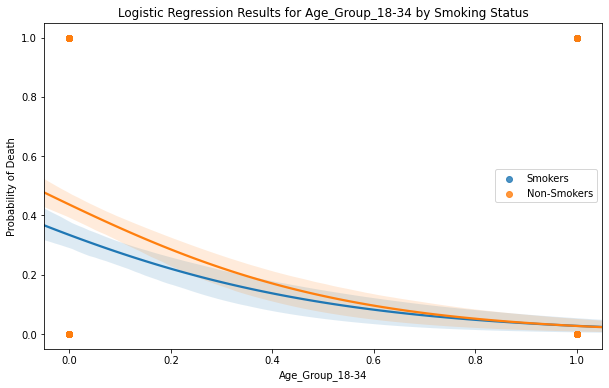

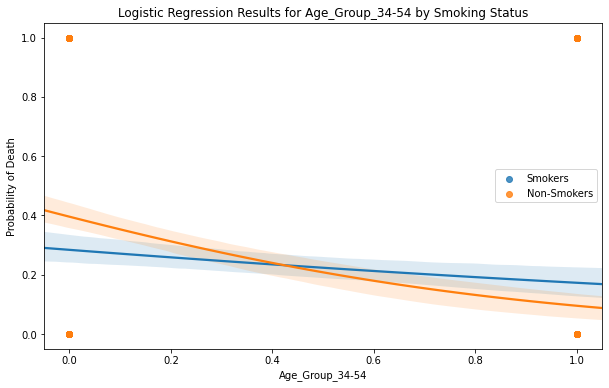

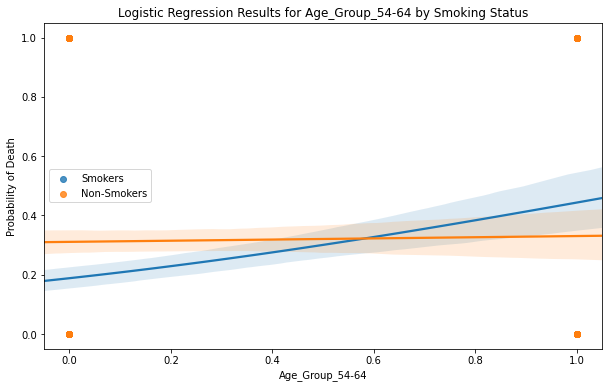

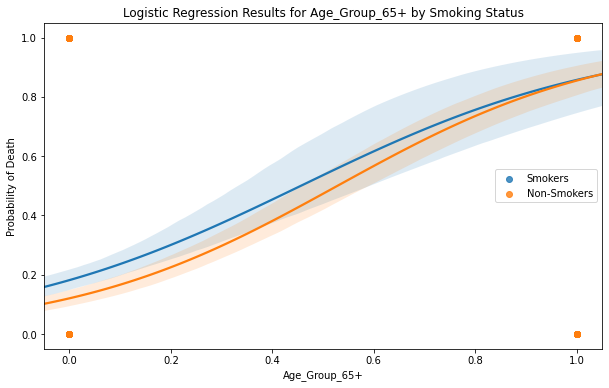

In [13]:
# Converting 'Smoker' column to binary (1 for 'Yes', 0 for 'No')
data_age_grouped['Smoker'] = (data_age_grouped['Smoker'] == 'Yes').astype(int)

# Converting 'Age_Group' to dummy variables - categorical variables as numerical values
age_group_dummies = pd.get_dummies(data_age_grouped['Age_Group'], prefix='Age_Group', drop_first=False)

# Combining the those with the original DataFrame
data_age_grouped = pd.concat([data_age_grouped, age_group_dummies], axis=1)

# Age group categorized
age_groups = ['Age_Group_18-34','Age_Group_34-54', 'Age_Group_54-64', 'Age_Group_65+']

# Creating logistic regression plots for each age group
for age_group in age_groups:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=age_group, y='Death', logistic=True, data=data_age_grouped[data_age_grouped['Smoker'] == 1], label='Smokers')
    sns.regplot(x=age_group, y='Death', logistic=True, data=data_age_grouped[data_age_grouped['Smoker'] == 0], label='Non-Smokers')
    plt.title(f'Logistic Regression Results for {age_group} by Smoking Status')
    plt.xlabel(age_group)
    plt.ylabel('Probability of Death')
    plt.legend()
    plt.show()

In [23]:
# Defining logistic regression model for smokers with GLM -Generalized Linear Model
smoker_model = sm.GLM(data_age_grouped[data_age_grouped['Smoker'] == 1]['Death'],
                      sm.add_constant(data_age_grouped[data_age_grouped['Smoker'] == 1][['Age_Group_18-34', 'Age_Group_34-54', 'Age_Group_54-64', 'Age_Group_65+']]),
                      family=sm.families.Binomial(), solver='bfgs')
smoker_results = smoker_model.fit()

# Define logistic regression model for non-smokers with GLM
non_smoker_model = sm.GLM(data_age_grouped[data_age_grouped['Smoker'] == 0]['Death'],
                          sm.add_constant(data_age_grouped[data_age_grouped['Smoker'] == 0][['Age_Group_18-34', 'Age_Group_34-54', 'Age_Group_54-64', 'Age_Group_65+']]),
                          family=sm.families.Binomial(), solver='bfgs')

non_smoker_results = non_smoker_model.fit()

print("Logistic Regression Results for Smokers:")
print(smoker_results.summary())

print("\nLogistic Regression Results for Non-Smokers:")
print(non_smoker_results.summary())



Logistic Regression Results for Smokers:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Death   No. Observations:                  582
Model:                            GLM   Df Residuals:                      578
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -231.11
Date:                Mon, 15 Jan 2024   Deviance:                       462.22
Time:                        23:48:53   Pearson chi2:                     581.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
c

### Observation
For both smokers and nonsmokers, the age group 18-34 has a much reduced risk of death than the reference group.
For both smokers and nonsmokers, the age groups 34-54 and 54-64 had significantly higher probabilities of death than the reference group.
Both smokers and nonsmokers are much more likely to die if they are 65 or older.
These findings provide inshight on the association between age groups and mortality risk, taking smoking status into account.

### Smokers:

Smoking appears to be connected with an increased risk of death across all age groups.
Smokers in the age categories 54-64 and 65+ have a considerably higher risk of death than nonsmokers.
The dangers of smoking are evident in the increased risk of death, especially in older age groups.

### Nonsmokers:

Non-smokers had a lower risk of death across all age groups.
Smoking does not appear to have a substantial effect on the risk of death in the 54-64 age range among nonsmokers.
Nonsmokers over the age of 65 still have an elevated risk of death, but the effect is less than for smokers.

The regressions indicate that smoking is connected with an increased risk of death, particularly in older age groups. The statistical connections found in the logistic regression models show that smoking has a negative impact on death rates.